In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (145, 145, 200)
y: (145, 145)


In [4]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

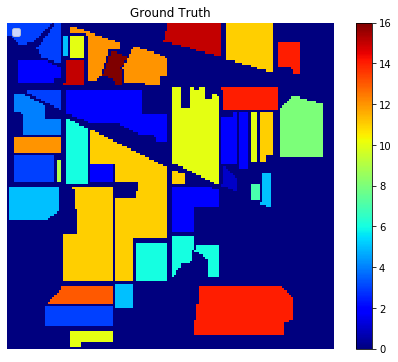

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [7]:
y = y.ravel()

In [8]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (21025, 200)
y: (21025,)


In [9]:
label,counts=np.unique(y,return_counts=True)
print(label)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[10776    46  1428   830   237   483   730    28   478    20   972  2455
   593   205  1265   386    93]


In [10]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
scaler_model.fit(X.astype(float))
X=scaler_model.transform(X)

In [11]:
print("X:", (X.shape))

X: (21025, 200)


In [12]:
X = (X[y>0,:])
Y = (y[y>0])

In [13]:
print(X.shape)
print(Y.shape)

(10249, 200)
(10249,)


In [14]:
pca = PCA(n_components=0.99)

In [15]:
X = pca.fit_transform(X)


In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.68738846, 0.87307195, 0.90336774, 0.92106184, 0.93397519,
       0.9404841 , 0.94555385, 0.94971401, 0.95342082, 0.95677653,
       0.95947647, 0.96214806, 0.96447112, 0.96662825, 0.96869344,
       0.97052915, 0.97210577, 0.97363506, 0.97513317, 0.97647022,
       0.97772841, 0.97886063, 0.97996183, 0.98098477, 0.98193106,
       0.98279177, 0.98363225, 0.98442276, 0.98520169, 0.98597545,
       0.98669647, 0.98733939, 0.98793382, 0.98851366, 0.98906986,
       0.98959938, 0.99006071])

In [17]:
print(X.shape)
print(pca.n_components_)

(10249, 37)
37


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.25, stratify=Y )

In [19]:
print(X_train.shape)
print(X_test.shape)

(7686, 37)
(2563, 37)


In [39]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

       0
1     35
2   1071
3    622
4    178
5    362
6    547
7     21
8    358
9     15
10   729
11  1841
12   445
13   154
14   949
15   289
16    70
      0
1    11
2   357
3   208
4    59
5   121
6   183
7     7
8   120
9     5
10  243
11  614
12  148
13   51
14  316
15   97
16   23


In [20]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

37


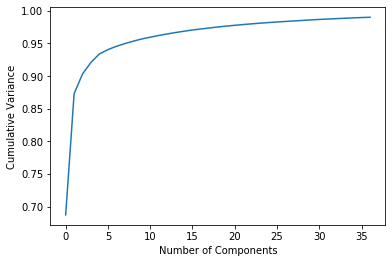

In [40]:
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance') #for each component
#plt.title('Inidian_pines Dataset Explained Variance')
plt.savefig('indian_pines_explainedvariance_final')
plt.show()

In [27]:
#Appplying SVM 

from sklearn.svm import SVC

In [28]:
from sklearn import metrics

In [29]:
# C_2d_range = range(10)/0.1
# gamma_2d_range = [0.01,0.1,0.2,0.3,1]
classifiers = []
# C_range=10
# Gamma_range = 10
Train_acc=[]
Valid_acc=[]
accuracy = -1
accuracy_train = -1
for C in np.arange(1,102,25):
    for gamma in np.arange(0.001,0.1,0.005):
        
        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train =metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)
        if (acc_train>accuracy_train):
            
            accuracy_train=acc_train
            best_c_train = C
            best_g_train=gamma
        print("C_train= ",C," Best C_train = ",best_c_train," gamma_train = ",gamma," best_gamma_train= ",best_g_train," Accuracy_train = ",acc_train," Best Accuracy_train = ",accuracy_train,"\n")

        if (acc>accuracy):
            accuracy=acc
            best_c = C
            best_g=gamma
        
        print("C= ",C," Best C = ",best_c," gamma = ",gamma," best_gamma= ",best_g," Accuracy = ",acc," Best Accuracy = ",accuracy,"\n")
        
        

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.001  best_gamma_train=  0.001  Accuracy_train =  0.6362217017954723  Best Accuracy_train =  0.6362217017954723 

C=  1  Best C =  1  gamma =  0.001  best_gamma=  0.001  Accuracy =  0.6281701131486539  Best Accuracy =  0.6281701131486539 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.006  best_gamma_train=  0.006  Accuracy_train =  0.7927400468384075  Best Accuracy_train =  0.7927400468384075 

C=  1  Best C =  1  gamma =  0.006  best_gamma=  0.006  Accuracy =  0.7557549746390948  Best Accuracy =  0.7557549746390948 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.011  best_gamma_train=  0.011  Accuracy_train =  0.8263075722092116  Best Accuracy_train =  0.8263075722092116 

C=  1  Best C =  1  gamma =  0.011  best_gamma=  0.011  Accuracy = 

C_train=  26  Best C_train =  26  gamma_train =  0.016  best_gamma_train=  0.016  Accuracy_train =  0.985167837626854  Best Accuracy_train =  0.985167837626854 

C=  26  Best C =  26  gamma =  0.016  best_gamma=  0.006  Accuracy =  0.8181818181818182  Best Accuracy =  0.8252048380803746 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.021  best_gamma_train=  0.021  Accuracy_train =  0.9936247723132969  Best Accuracy_train =  0.9936247723132969 

C=  26  Best C =  26  gamma =  0.021  best_gamma=  0.006  Accuracy =  0.8095981271946937  Best Accuracy =  0.8252048380803746 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.026000000000000002  best_gamma_train=  0.026000000000000002  Accuracy_train =  0.998048399687744  Best Accuracy_train =  0.998048399687744 

C=  26  Best C =  26  gamma =  0.026000000000000002  best_gamma=  0.006  Accuracy =  0.802184939

C_train=  51  Best C_train =  26  gamma_train =  0.036000000000000004  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.036000000000000004  best_gamma=  0.006  Accuracy =  0.7908700741318767  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.041  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.041  best_gamma=  0.006  Accuracy =  0.7885290674990246  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.046  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.046  best_gamma=  0.006  Accuracy =  0.7822863831447523  Best Accuracy =  0.8271556769410847 

------------------------------------------------------

C_train=  76  Best C_train =  26  gamma_train =  0.061  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.061  best_gamma=  0.006  Accuracy =  0.7662895044869293  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.066  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.066  best_gamma=  0.006  Accuracy =  0.7631681623097932  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.07100000000000001  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.07100000000000001  best_gamma=  0.006  Accuracy =  0.7569254779555209  Best Accuracy =  0.8271556769410847 

--------------------------------------------------------

C_train=  101  Best C_train =  26  gamma_train =  0.08600000000000001  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  51  gamma =  0.08600000000000001  best_gamma=  0.006  Accuracy =  0.7366367538041357  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.091  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  51  gamma =  0.091  best_gamma=  0.006  Accuracy =  0.7311744049941474  Best Accuracy =  0.8271556769410847 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.096  best_gamma_train=  0.041  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  51  gamma =  0.096  best_gamma=  0.006  Accuracy =  0.722590714007023  Best Accuracy =  0.8271556769410847 



In [31]:
clf = SVC(C=51,gamma=0.006,decision_function_shape='ovo')

In [32]:
clf.fit(X_train, y_train)

SVC(C=51, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.006, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn import metrics

In [35]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 82.71556769410847


In [36]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 80.24717453676739


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.73      0.79      0.76       357
           3       0.79      0.72      0.76       208
           4       0.70      0.66      0.68        59
           5       0.91      0.92      0.91       121
           6       0.94      0.96      0.95       183
           7       0.88      1.00      0.93         7
           8       0.98      0.98      0.98       120
           9       1.00      1.00      1.00         5
          10       0.76      0.75      0.76       243
          11       0.78      0.79      0.79       614
          12       0.84      0.75      0.79       148
          13       1.00      1.00      1.00        51
          14       0.92      0.97      0.94       316
          15       0.83      0.65      0.73        97
          16       1.00      0.96      0.98        23

    accuracy                           0.83      2563
   macro avg       0.87   

In [38]:
print(pd.DataFrame(mat))

    0    1    2   3    4    5  6    7  8    9   10   11  12   13  14  15
0   9    0    0   0    0    0  0    2  0    0    0    0   0    0   0   0
1   0  282   14   9    0    0  0    0  0   17   58    6   0    0   0   0
2   0    3  150   5    1    0  0    0  0    2   19    9   0    0   0   0
3   0    1    7  39    3    0  0    0  0    1    0    5   0    0   0   0
4   1    1    0   0  111    2  0    0  0    1    1    1   0    3   1   0
5   0    2    0   1    3  176  0    0  0    1    0    0   0    1   4   0
6   0    0    0   0    0    0  7    0  0    0    1    0   0    0   0   0
7   1    0    0   1    0    0  0  118  0    0    0    0   0    0   0   0
8   0    0    0   0    0    0  0    0  5    0    0    0   0    0   0   0
9   0   15    4   1    0    0  0    0  0  183   34    3   0    0   0   0
10  0   51   33   2    0    0  0    0  0   36  488   13   0    0   1   0
11  0    2    0   1    1    0  0    0  0    2   13  111   0    0   1   1
12  0    0    0   0    0    0  0    0  0    0    0 